In [1]:
import numpy as np
import scipy as sp
import pylab as pl
import ot
import matplotlib

from solvers import solver_semirelax_L2_UOT as srl2
from solvers import solvers_L2_UOT as l2
from sklearn.datasets import make_blobs

### Draw the two samples

In [2]:
n = 100
np.random.seed(0)

xs = np.random.randn(n,2)
xt = np.random.randn(n,2)+4

C = ot.dist(xs,xt)
a = ot.unif(n)

### Compute the UOT

In [3]:
lambdamax = 1000
Plam2, lam2, Pi_list2, lambda_list2, n_iter2=l2.ot_ul2_reg_path(a, a, C,lambdamax=lambdamax, savePi=True)
Pinf = ot.emd(a,a,C)
P_lst2 = [np.array(Pi_list2[0].todense()), np.array(Pi_list2[14].todense()), Plam2, Pinf]

### Compute the semi-relaxed UOT

In [4]:
lambdamax = 1000
P, lam, Pi_list, lambda_list, n_iter = srl2.ot_semi_relaxed_ul2_reg_path(a, a, C,lambdamax=lambdamax)
Pinf = ot.emd(a,a,C)

lamb_lst = [0, 100, 1000, np.inf]
P_lst = [np.array(Pi_list[0].todense()), np.array(Pi_list[1169].todense()), P, Pinf]

/Users/lchapel/Documents/2021/regularization path OT/code/code_soumission/solvers/solver_semirelax_L2_UOT.py:53: RuntimeWarning: divide by zero encountered in true_divide
  l = -delta / pt


### Figure 2

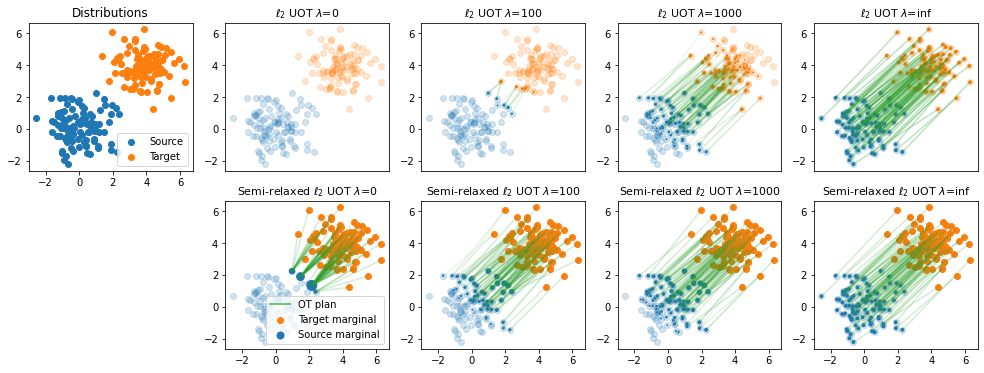

In [6]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
pl.figure(4,(17,6))
pl.clf()

#Plot the 2 samples
pl.subplot(2,5,1)
pl.scatter(xs[:,0], xs[:,1], c='C0', label='Source')
pl.scatter(xt[:,0], xt[:,1], c='C1', label='Target')
pl.legend()
pl.title('Distributions')

#Plot the UOT for several lambdas
for p in range(4):
    pl.subplot(2,5,2+p)
    P = P_lst2[p]
    if P.sum() > 0:
        P = P / P.max()
    for i in range(n):
        for j in range(n):
            if P[i,j] > 0:
                pl.plot([xs[i,0], xt[j,0]], [xs[i,1], xt[j,1]], color='C2', alpha=P[i,j]*0.3)
    pl.scatter(xs[:,0], xs[:,1], c='C0', alpha=0.2)
    pl.scatter(xt[:,0], xt[:,1], c='C1', alpha=0.2)
    pl.scatter(xs[:,0], xs[:,1], c='C0', s=P.sum(1).ravel()*(1+p)*2, label='Reweighted source', alpha=1)
    pl.scatter(xt[:,0], xt[:,1], c='C1', s=P.sum(0).ravel()*(1+p)*2, label='Reweighted target', alpha=1)
    pl.plot([], [], color='C2', alpha=0.8, label='OT plan')
    pl.title('$\ell_2$ UOT $\lambda$={}'.format(lamb_lst[p]), fontsize=11)
    pl.xticks(())

#Plot the semi-relaxed UOT for several lambdas
for p in range(4):
    pl.subplot(2,5,2+5+p)
    P = P_lst[p]
    for i in range(n):
        for j in range(n):
            if P[i,j] > 0:
                pl.plot([xs[i,0], xt[j,0]],[xs[i,1], xt[j,1]], color='C2', alpha=n*P[i,j]*0.2)
    pl.scatter(xs[:,0], xs[:,1], c='C0', alpha=0.2)
    pl.scatter(xt[:,0], xt[:,1], c='C1', alpha=1, label='Target marginal')
    pl.scatter(xs[:,0], xs[:,1], c='C0', s=P.sum(1).ravel()*200*(1+p), label='Source marginal', alpha=1)
    pl.plot([], [], color='C2', alpha=0.8, label='OT plan')
    pl.title('Semi-relaxed $\ell_2$ UOT $\lambda$={}'.format(lamb_lst[p]), fontsize=11)
    if p == 0:
        pl.legend()
        
#pl.savefig('regpath_l2.pdf',bbox_inches='tight')
pl.savefig('regpath_l2.jpg',bbox_inches='tight')
pl.show()